<a href="https://colab.research.google.com/github/satvik-27199/Drug_Discovery/blob/main/drug_discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install chembl_webresource_client

In [ ]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [ ]:
target = new_client.target
target_query = target.search('cancer')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Cancer-related nucleoside-triphosphatase,14.0,False,CHEMBL4295936,"[{'accession': 'Q9BSD7', 'component_descriptio...",SINGLE PROTEIN,9606.0
1,"[{'xref_id': 'P38398', 'xref_name': None, 'xre...",Homo sapiens,Breast cancer type 1 susceptibility protein,12.0,False,CHEMBL5990,"[{'accession': 'P38398', 'component_descriptio...",SINGLE PROTEIN,9606.0
2,[],None,cancer cell lines,11.0,False,CHEMBL614375,[],CELL-LINE,NaN
3,"[{'xref_id': 'O14519', 'xref_name': None, 'xre...",Homo sapiens,Cyclin-dependent kinase 2-associated protein 1,11.0,False,CHEMBL5578,"[{'accession': 'O14519', 'component_descriptio...",SINGLE PROTEIN,9606.0
4,[],Homo sapiens,Ovarian cancer G-protein coupled receptor 1,11.0,False,CHEMBL3713916,"[{'accession': 'Q15743', 'component_descriptio...",SINGLE PROTEIN,9606.0
...,...,...,...,...,...,...,...,...,...
62,[],Mus musculus,Mitogen-activated protein kinase kinase kinase 20,4.0,False,CHEMBL4523452,"[{'accession': 'Q9ESL4', 'component_descriptio...",SINGLE PROTEIN,10090.0
63,[],Homo sapiens,Aurora kinase A/Targeting protein for Xklp2,3.0,False,CHEMBL3883304,"[{'accession': 'O14965', 'component_descriptio...",PROTEIN COMPLEX,9606.0
64,[],Homo sapiens,Speckle-type POZ protein/PTEN,3.0,False,CHEMBL4523606,"[{'accession': 'P60484', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606.0
65,[],Homo sapiens,Mitochondrial complex I (NADH dehydrogenase),0.0,False,CHEMBL2363065,"[{'accession': 'P03923', 'component_descriptio...",PROTEIN COMPLEX,9606.0


In [ ]:
wselected_target = targets.target_chembl_id[2]
selected_target = 'CHEMBL2107'

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,75516,[],CHEMBL652953,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL105570,None,CHEMBL105570,None,False,http://www.openphacts.org/units/Nanomolar,197080,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
1,None,82318,[],CHEMBL652953,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL105659,None,CHEMBL105659,None,False,http://www.openphacts.org/units/Nanomolar,197081,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
2,None,88387,[],CHEMBL652951,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL321539,None,CHEMBL321539,None,False,http://www.openphacts.org/units/Nanomolar,197083,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
3,None,90262,[],CHEMBL652951,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL104474,None,CHEMBL104474,None,False,http://www.openphacts.org/units/Nanomolar,197085,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
4,None,90269,[],CHEMBL652953,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL319622,None,CHEMBL319622,None,False,http://www.openphacts.org/units/Nanomolar,197082,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,None,19438254,[],CHEMBL4430940,Binding affinity to CXCR4 (unknown origin) exp...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,None,None,CHEMBL4428122,Bioorg Med Chem,2016.0,"{'bei': '3.78', 'le': None, 'lle': None, 'sei'...",CHEMBL4461110,None,CHEMBL4461110,5.66,False,http://www.openphacts.org/units/Nanomolar,3246976,=,1,True,=,None,IC50,nM,None,2200.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,uM,UO_0000065,None,2.2
1221,None,19438255,[],CHEMBL4430940,Binding affinity to CXCR4 (unknown origin) exp...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,None,None,CHEMBL4428122,Bioorg Med Chem,2016

In [ ]:
df.to_csv('acetylcholinesterase_01_bioactivity_data_raw.csv', index=False)

In [ ]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,75516,[],CHEMBL652953,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL105570,None,CHEMBL105570,None,False,http://www.openphacts.org/units/Nanomolar,197080,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
1,None,82318,[],CHEMBL652953,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL105659,None,CHEMBL105659,None,False,http://www.openphacts.org/units/Nanomolar,197081,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
2,None,88387,[],CHEMBL652951,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL321539,None,CHEMBL321539,None,False,http://www.openphacts.org/units/Nanomolar,197083,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
3,None,90262,[],CHEMBL652951,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL104474,None,CHEMBL104474,None,False,http://www.openphacts.org/units/Nanomolar,197085,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
4,None,90269,[],CHEMBL652953,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL319622,None,CHEMBL319622,None,False,http://www.openphacts.org/units/Nanomolar,197082,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,None,19438254,[],CHEMBL4430940,Binding affinity to CXCR4 (unknown origin) exp...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,None,None,CHEMBL4428122,Bioorg Med Chem,2016.0,"{'bei': '3.78', 'le': None, 'lle': None, 'sei'...",CHEMBL4461110,None,CHEMBL4461110,5.66,False,http://www.openphacts.org/units/Nanomolar,3246976,=,1,True,=,None,IC50,nM,None,2200.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,uM,UO_0000065,None,2.2
1221,None,19438255,[],CHEMBL4430940,Binding affinity to CXCR4 (unknown origin) exp...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,None,None,CHEMBL4428122,Bioorg Med Chem,2016

In [ ]:
len(df2.canonical_smiles.unique())

968

In [ ]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,75516,[],CHEMBL652953,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL105570,None,CHEMBL105570,None,False,http://www.openphacts.org/units/Nanomolar,197080,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
1,None,82318,[],CHEMBL652953,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL105659,None,CHEMBL105659,None,False,http://www.openphacts.org/units/Nanomolar,197081,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
2,None,88387,[],CHEMBL652951,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL321539,None,CHEMBL321539,None,False,http://www.openphacts.org/units/Nanomolar,197083,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
3,None,90262,[],CHEMBL652951,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL104474,None,CHEMBL104474,None,False,http://www.openphacts.org/units/Nanomolar,197085,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
4,None,90269,[],CHEMBL652953,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL319622,None,CHEMBL319622,None,False,http://www.openphacts.org/units/Nanomolar,197082,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,None,19438254,[],CHEMBL4430940,Binding affinity to CXCR4 (unknown origin) exp...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,None,None,CHEMBL4428122,Bioorg Med Chem,2016.0,"{'bei': '3.78', 'le': None, 'lle': None, 'sei'...",CHEMBL4461110,None,CHEMBL4461110,5.66,False,http://www.openphacts.org/units/Nanomolar,3246976,=,1,True,=,None,IC50,nM,None,2200.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,uM,UO_0000065,None,2.2
1221,None,19438255,[],CHEMBL4430940,Binding affinity to CXCR4 (unknown origin) exp...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,None,None,CHEMBL4428122,Bioorg Med Chem,2016

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,1000.0
1,CHEMBL105659,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,1000.0
2,CHEMBL321539,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,1000.0
3,CHEMBL104474,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,1000.0
4,CHEMBL319622,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,1000.0
...,...,...,...
1220,CHEMBL4461110,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,2200.0
1221,CHEMBL4551153,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,462.0
1222,CHEMBL4446733,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,2000.0
1223,CHEMBL4645971,COc1cc(C(=O)N[C@H]2C[C@@H]3CCC[C@H](C2)N3CC(=O...,80000.0


In [ ]:
df3.to_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv', index=False)

In [ ]:
df4 = pd.read_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [ ]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,1000.0,active
1,CHEMBL105659,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,1000.0,active
2,CHEMBL321539,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,1000.0,active
3,CHEMBL104474,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,1000.0,active
4,CHEMBL319622,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,1000.0,active
...,...,...,...,...
963,CHEMBL4461110,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,2200.0,intermediate
964,CHEMBL4551153,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,462.0,active
965,CHEMBL4446733,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,2000.0,intermediate
966,CHEMBL4645971,COc1cc(C(=O)N[C@H]2C[C@@H]3CCC[C@H](C2)N3CC(=O...,80000.0,inactive


In [ ]:
df5.to_csv('acetylcholinesterase_03_bioactivity_data_curated.csv', index=False)

In [ ]:
df = pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,1000.0,active
1,CHEMBL105659,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,1000.0,active
2,CHEMBL321539,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,1000.0,active
3,CHEMBL104474,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,1000.0,active
4,CHEMBL319622,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,1000.0,active
...,...,...,...,...
963,CHEMBL4461110,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,2200.0,intermediate
964,CHEMBL4551153,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,462.0,active
965,CHEMBL4446733,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,2000.0,intermediate
966,CHEMBL4645971,COc1cc(C(=O)N[C@H]2C[C@@H]3CCC[C@H](C2)N3CC(=O...,80000.0,inactive


In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL105570,1000.0,active,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...
1,CHEMBL105659,1000.0,active,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...
2,CHEMBL321539,1000.0,active,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...
3,CHEMBL104474,1000.0,active,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...
4,CHEMBL319622,1000.0,active,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...
...,...,...,...,...
963,CHEMBL4461110,2200.0,intermediate,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...
964,CHEMBL4551153,462.0,active,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...
965,CHEMBL4446733,2000.0,intermediate,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...
966,CHEMBL4645971,80000.0,inactive,COc1cc(C(=O)N[C@H]2C[C@@H]3CCC[C@H](C2)N3CC(=O...


In [ ]:

! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-08-02 20:21:49--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   155MB/s    in 0.5s    

2021-08-02 20:21:50 (155 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [ ]:
import rdkit
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,581.717,6.58170,0.0,7.0
1,536.720,6.67350,0.0,5.0
2,550.747,7.06180,0.0,5.0
3,522.693,6.49940,0.0,5.0
4,595.744,6.97000,0.0,7.0
...,...,...,...,...
963,1496.738,-5.91523,21.0,22.0
964,2313.619,-9.48446,35.0,32.0
965,1166.309,-4.48583,18.0,16.0
966,502.011,4.11980,2.0,6.0


In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,581.717,6.58170,0.0,7.0
1,536.720,6.67350,0.0,5.0
2,550.747,7.06180,0.0,5.0
3,522.693,6.49940,0.0,5.0
4,595.744,6.97000,0.0,7.0
...,...,...,...,...
963,1496.738,-5.91523,21.0,22.0
964,2313.619,-9.48446,35.0,32.0
965,1166.309,-4.48583,18.0,16.0
966,502.011,4.11980,2.0,6.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,1000.0,active
1,CHEMBL105659,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,1000.0,active
2,CHEMBL321539,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,1000.0,active
3,CHEMBL104474,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,1000.0,active
4,CHEMBL319622,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,1000.0,active
...,...,...,...,...
963,CHEMBL4461110,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,2200.0,intermediate
964,CHEMBL4551153,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,462.0,active
965,CHEMBL4446733,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,2000.0,intermediate
966,CHEMBL4645971,COc1cc(C(=O)N[C@H]2C[C@@H]3CCC[C@H](C2)N3CC(=O...,80000.0,inactive


In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,1000.0,active,581.717,6.58170,0.0,7.0
1,CHEMBL105659,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,1000.0,active,536.720,6.67350,0.0,5.0
2,CHEMBL321539,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,1000.0,active,550.747,7.06180,0.0,5.0
3,CHEMBL104474,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,1000.0,active,522.693,6.49940,0.0,5.0
4,CHEMBL319622,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,1000.0,active,595.744,6.97000,0.0,7.0
...,...,...,...,...,...,...,...,...
963,CHEMBL4461110,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,2200.0,intermediate,1496.738,-5.91523,21.0,22.0
964,CHEMBL4551153,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,462.0,active,2313.619,-9.48446,35.0,32.0
965,CHEMBL4446733,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,2000.0,intermediate,1166.309,-4.48583,18.0,16.0
966,CHEMBL4645971,COc1cc(C(=O)N[C@H]2C[C@@H]3CCC[C@H](C2)N3CC(=O...,80000.0,inactive,502.011,4.11980,2.0,6.0


In [ ]:

# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [ ]:
df_combined.standard_value.describe()

count       968.000000
mean       5929.646818
std       13657.360471
min           0.600000
25%          32.150000
50%         219.500000
75%        3518.750000
max      170000.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,581.717,6.58170,0.0,7.0,1000.0
1,CHEMBL105659,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,active,536.720,6.67350,0.0,5.0,1000.0
2,CHEMBL321539,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,active,550.747,7.06180,0.0,5.0,1000.0
3,CHEMBL104474,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,active,522.693,6.49940,0.0,5.0,1000.0
4,CHEMBL319622,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,595.744,6.97000,0.0,7.0,1000.0
...,...,...,...,...,...,...,...,...
963,CHEMBL4461110,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,intermediate,1496.738,-5.91523,21.0,22.0,2200.0
964,CHEMBL4551153,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,active,2313.619,-9.48446,35.0,32.0,462.0
965,CHEMBL4446733,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,intermediate,1166.309,-4.48583,18.0,16.0,2000.0
966,CHEMBL4645971,COc1cc(C(=O)N[C@H]2C[C@@H]3CCC[C@H](C2)N3CC(=O...,inactive,502.011,4.11980,2.0,6.0,80000.0


In [ ]:
df_norm.standard_value_norm.describe()

count       968.000000
mean       5929.646818
std       13657.360471
min           0.600000
25%          32.150000
50%         219.500000
75%        3518.750000
max      170000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,581.717,6.58170,0.0,7.0,6.000000
1,CHEMBL105659,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,active,536.720,6.67350,0.0,5.0,6.000000
2,CHEMBL321539,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,active,550.747,7.06180,0.0,5.0,6.000000
3,CHEMBL104474,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,active,522.693,6.49940,0.0,5.0,6.000000
4,CHEMBL319622,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,595.744,6.97000,0.0,7.0,6.000000
...,...,...,...,...,...,...,...,...
963,CHEMBL4461110,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,intermediate,1496.738,-5.91523,21.0,22.0,5.657577
964,CHEMBL4551153,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,active,2313.619,-9.48446,35.0,32.0,6.335358
965,CHEMBL4446733,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,intermediate,1166.309,-4.48583,18.0,16.0,5.698970
966,CHEMBL4645971,COc1cc(C(=O)N[C@H]2C[C@@H]3CCC[C@H](C2)N3CC(=O...,inactive,502.011,4.11980,2.0,6.0,4.096910


In [ ]:
df_final.pIC50.describe()

count    968.000000
mean       6.491035
std        1.247311
min        3.769551
25%        5.453630
50%        6.658567
75%        7.492821
max        9.221849
Name: pIC50, dtype: float64

In [ ]:
df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

In [ ]:

df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,581.717,6.58170,0.0,7.0,6.000000
1,CHEMBL105659,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,active,536.720,6.67350,0.0,5.0,6.000000
2,CHEMBL321539,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,active,550.747,7.06180,0.0,5.0,6.000000
3,CHEMBL104474,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,active,522.693,6.49940,0.0,5.0,6.000000
4,CHEMBL319622,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,595.744,6.97000,0.0,7.0,6.000000
...,...,...,...,...,...,...,...,...
961,CHEMBL4470663,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,active,3024.482,-10.69206,39.0,45.0,7.638272
962,CHEMBL4443891,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,active,2848.270,-10.75846,39.0,41.0,7.657577
964,CHEMBL4551153,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,active,2313.619,-9.48446,35.0,32.0,6.335358
966,CHEMBL4645971,COc1cc(C(=O)N[C@H]2C[C@@H]3CCC[C@H](C2)N3CC(=O...,inactive,502.011,4.11980,2.0,6.0,4.096910


In [ ]:
df_2class.to_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv')

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

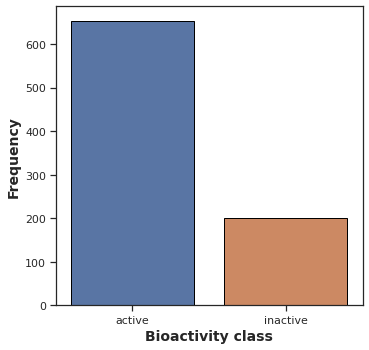

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

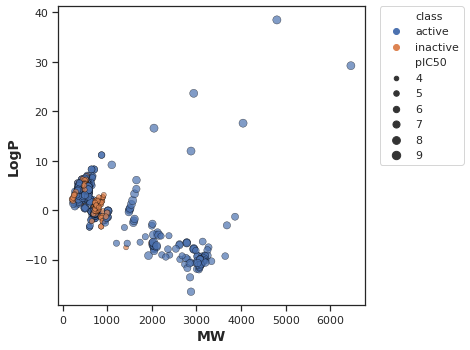

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

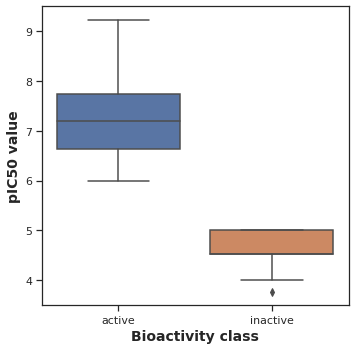

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,2.691123e-102,0.05,Different distribution (reject H0)


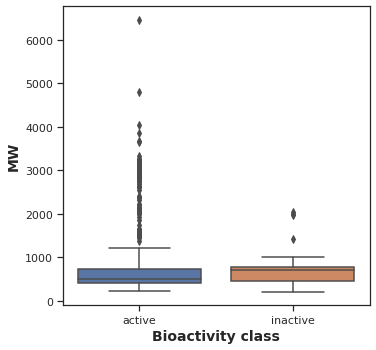

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,53895.5,0.000082,0.05,Different distribution (reject H0)


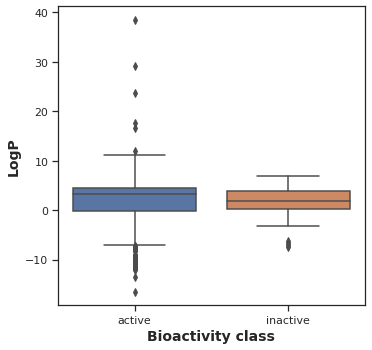

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,56716.5,0.002226,0.05,Different distribution (reject H0)


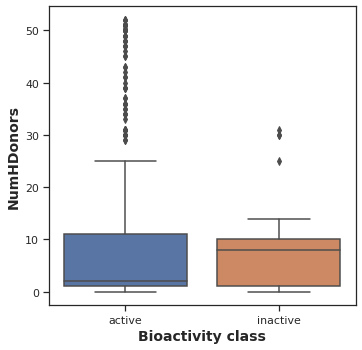

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:

mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,61699.0,0.109106,0.05,Same distribution (fail to reject H0)


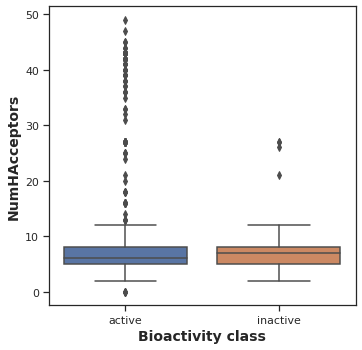

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:

mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,59480.0,0.025132,0.05,Different distribution (reject H0)


In [ ]:
df3 = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

In [ ]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,581.717,6.58170,0.0,7.0,6.000000
1,1,CHEMBL105659,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,active,536.720,6.67350,0.0,5.0,6.000000
2,2,CHEMBL321539,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,active,550.747,7.06180,0.0,5.0,6.000000
3,3,CHEMBL104474,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,active,522.693,6.49940,0.0,5.0,6.000000
4,4,CHEMBL319622,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,595.744,6.97000,0.0,7.0,6.000000
...,...,...,...,...,...,...,...,...,...
963,963,CHEMBL4461110,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,intermediate,1496.738,-5.91523,21.0,22.0,5.657577
964,964,CHEMBL4551153,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,active,2313.619,-9.48446,35.0,32.0,6.335358
965,965,CHEMBL4446733,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,intermediate,1166.309,-4.48583,18.0,16.0,5.698970
966,966,CHEMBL4645971,COc1cc(C(=O)N[C@H]2C[C@@H]3CCC[C@H](C2)N3CC(=O...,inactive,502.011,4.11980,2.0,6.0,4.096910


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:

! cat molecule.smi | head -5

C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(C)(Cn2cnc3ccccc32)c2ccccc2)CC1	CHEMBL105570
C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3ccccc32)c2ccccc2)CC1	CHEMBL105659
C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccccc32)c2ccccc2)CC1	CHEMBL321539
C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32)c2ccccc2)CC1	CHEMBL104474
C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(Cn2c(CC)nc3ccccc32)c2ccccc2)CC1	CHEMBL319622


In [ ]:
! cat molecule.smi | wc -l

968


In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2021-08-02 20:31:30--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2021-08-02 20:31:30--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   114MB/s    in 0.2s    

2021-08-02 20:31:31 (114 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2021-08-02 20:31:31--  https://github

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL105570 in molecule.smi (1/968). 
Processing CHEMBL105659 in molecule.smi (2/968). 
Processing CHEMBL321539 in molecule.smi (3/968). Average speed: 6.48 s/mol.
Processing CHEMBL104474 in molecule.smi (4/968). Average speed: 3.27 s/mol.
Processing CHEMBL319622 in molecule.smi (5/968). Average speed: 2.86 s/mol.
Processing CHEMBL106803 in molecule.smi (6/968). Average speed: 2.16 s/mol.
Processing CHEMBL545532 in molecule.smi (7/968). Average speed: 2.07 s/mol.
Processing CHEMBL1202230 in molecule.smi (8/968). Average speed: 1.75 s/mol.
Processing CHEMBL545063 in molecule.smi (10/968). Average speed: 1.43 s/mol.
Processing CHEMBL2311089 in molecule.smi (9/968). Average speed: 1.60 s/mol.
Processing CHEMBL553964 in molecule.smi (12/968). Average speed: 1.20 s/mol.
Processing CHEMBL541337 in molecule.smi (11/968). Average speed: 1.33 s/mol.
Processing CHEMBL543895 in molecule.smi (13/968). Average speed: 1.14 s/mol.
Processing CHEMBL555039 in molecule.smi (14/968). Average 

In [ ]:
! ls -l

total 111812
-rw-r--r-- 1 root root   874771 Aug  2 20:18 acetylcholinesterase_01_bioactivity_data_raw.csv
-rw-r--r-- 1 root root   130798 Aug  2 20:18 acetylcholinesterase_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root   138664 Aug  2 20:18 acetylcholinesterase_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root   195035 Aug  2 20:26 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root   175385 Aug  2 20:27 acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv
-rw-r--r-- 1 root root  1732300 Aug  2 20:45 descriptors_output.csv
drwxr-xr-x 3 root root     4096 Aug  2 20:33 __MACOSX
-rw-r--r-- 1 root root      123 Aug  2 20:29 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      120 Aug  2 20:28 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      131 Aug  2 20:29 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      130 Aug  2 20:29 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      121 Aug  2 20:28 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 ro

In [ ]:

df3_X = pd.read_csv('descriptors_output.csv')

In [ ]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL105570,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CHEMBL105659,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CHEMBL104474,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL321539,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CHEMBL319622,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,CHEMBL4461110,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
964,CHEMBL4446733,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
965,CHEMBL4645971,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
966,CHEMBL4634148,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
964,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
965,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
966,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3_Y = df3['pIC50']
df3_Y

0      6.000000
1      6.000000
2      6.000000
3      6.000000
4      6.000000
         ...   
963    5.657577
964    6.335358
965    5.698970
966    4.096910
967    4.823909
Name: pIC50, Length: 968, dtype: float64

In [ ]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.000000
1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.000000
2,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.000000
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.000000
4,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.657577
964,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.335358
965,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.698970
966,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.096910


In [ ]:
dataset3.to_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2021-08-02 20:50:12--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2021-08-02 20:50:13--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_

In [ ]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
964,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
965,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
966,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

Y = df.pIC50
Y

0      6.000000
1      6.000000
2      6.000000
3      6.000000
4      6.000000
         ...   
963    5.657577
964    6.335358
965    5.698970
966    4.096910
967    4.823909
Name: pIC50, Length: 968, dtype: float64

In [ ]:
X.shape

(968, 881)

In [ ]:
Y.shape

(968,)

In [ ]:

from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:

X.shape

(968, 138)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:

X_train.shape, Y_train.shape

((774, 881), (774,))

In [ ]:

X_test.shape, Y_test.shape

((194, 881), (194,))

In [ ]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.3259855852569581

In [ ]:
Y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

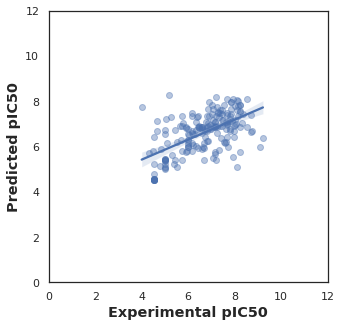

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show